<a href="https://colab.research.google.com/github/JuhiNayak/Machine-Learning/blob/master/NumericProject_DataCleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bank Loan Approval Prediction System

*Business Case*: Our business case is to predict whether the bank loan will be approved or not to any applicant based on various features available in the datasets. We have gathered bank loan related data from various sources. We found a few of the sources really good that can be used for our business case.

*Data Source:*

- Loan Prediction Problem Dataset: https://www.kaggle.com/altruistdelhite04/loan-prediction-problem-dataset
We took a Loan Prediction Problem Dataset, this dataset is by Dream Housing Finance company that deals in all home loans. Customers first apply for a home loan after that company validates the customer eligibility for a loan.
The company wants to automate the loan eligibility process (real-time) based on customer detail provided while filling the online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History, and others. To automate this process, they have given a problem to identify the customer’s segments, those are eligible for loan amount so that they can specifically target these customers.


- Lending Club Dataset: https://www.kaggle.com/wordsforthewise/lending-club
Also, we have gathered data from Lending Club. It is an American peer-to-peer lending company. It was the first peer-to-peer lender to offer loan trading on a secondary market. LendingClub enables borrowers to create loan listings on its website by supplying details about themselves and the loans that they would like to request. All loans are unsecured personal loans and can be between 1,000 - 40,000 dollars. On the basis of the borrower’s credit score, credit history, desired loan amount, and the borrower’s debt-to-income ratio, LendingClub determines whether the borrower is creditworthy and assigns to its approved loans a credit grade that determines the payable interest rate and fees.
We have also followed a similar approach to predict whether the loan should be approved or not based on the combined data from both of these sources.


Features Analysis Excel: https://sjsu0-my.sharepoint.com/:x:/g/personal/juhi_nayak_sjsu_edu/EXjGpC6keKRPkbOKv_nb5kcBo_NcIAqFsReNJq-B5N5yPA?e=lUnXU3

# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_colwidth', -1)
from sklearn import preprocessing
import seaborn as seabornInstance 
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!ls ./drive/My\ Drive/the-feature-finders/datasets/loan-prediction

Mounted at /content/drive
BankLoanApprovalFinalDataset1.csv	SPSS_loan_roc.sav
BankLoanApprovalFinalDataset.csv	test_Y3wMUE5_7gLdaTN.csv
BankLoanApprovalFinalMergedDataset.csv	train_u6lujuX_CVtuZ9i.csv
lending-club				usStatesWithMostDebtAbbr.csv
LoanPredictionProblemDescription.xlsx


# Feature Transformation and Data Enrichment

We have used feature transformation to compare accuracy. Feature Transformation includes many steps that helps to create new features based on the existing features. It is simply a function that transforms features from one representation to another. We have followed a few ways mentioned below to achieve this.

* Transforming categorical features to numerical.
* Scaling or normalizing features within a range, say between 0 to 1.
* Data Imputation.

We have used two different data sources and a website to scrape data hence performed data amalgamation and data enrichment to merge these datasets.

# Lending Club Dataset

## Load Dataset

In [ ]:
# Take the latest data for year 2018

path = '/content/drive/My Drive/the-feature-finders/datasets/loan-prediction/lending-club/accepted_2007_to_2018Q4.csv.gz'
data = pd.read_csv(path,parse_dates=['issue_d'], infer_datetime_format=True,low_memory=False)
data = data[(data.issue_d >= '2018-01-01 00:00:00') & (data.issue_d < '2019-01-01 00:00:00')]
data = data.reset_index(drop=True)

data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,...,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,130954621,NaN,5000.0,5000.0,5000.0,36 months,20.39,186.82,D,D4,General Manager,8 years,RENT,50000.0,Verified,2018-03-01,Current,n,https://lendingclub.com/browse/loanDetail.action?loan_id=130954621,NaN,other,Other,740xx,OK,21.80,1.0,Jan-2009,665.0,669.0,0.0,9.0,NaN,5.0,0.0,116.0,23.2,18.0,w,3780.31,3780.31,...,33430.0,19344.0,500.0,27820.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,130964697,NaN,15000.0,15000.0,15000.0,36 months,9.92,483.45,B,B2,IT Director,2 years,OWN,196000.0,Source Verified,2018-03-01,Current,n,https://lendingclub.com/browse/loanDetail.action?loan_id=130964697,NaN,debt_consolidation,Debt consolidation,337xx,FL,18.29,0.0,Jul-1998,700.0,704.0,0.0,65.0,NaN,19.0,0.0,24243.0,46.3,53.0,w,10878.50,10878.50,...,605228.0,137713.0,28500.0,147178.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,130955326,NaN,11200.0,11200.0,11200.0,60 months,30.79,367.82,G,G1,Client services,< 1 year,RENT,44000.0,Not Verified,2018-03-01,Current,n,https://lendingclub.com/browse/loanDetail.action?loan_id=130955326,NaN,medical,Medical expenses,030xx,NH,43.97,1.0,Jul-2007,665.0,669.0,2.0,6.0,NaN,8.0,0.0,1526.0,24.6,14.0,w,10193.73,10193.73,...,80367.0,67173.0,1900.0,74167.0,7101.0,610.0,614.0,Feb-2005,3.0,1.0,14.0,80.0,11.0,8.0,0.0,2.0,37.0,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,130504052,NaN,25000.0,25000.0,25000.0,60 months,21.85,688.35,D,D5,Asphalt Supervisor,10+ years,MORTGAGE,65000.0,Source Verified,2018-03-01,Current,n,https://lendingclub.com/browse/loanDetail.action?loan_id=130504052,NaN,debt_consolidation,Debt consolidation,361xx,AL,12.89,1.0,Mar-1995,665.0,669.0,1.0,22.0,NaN,7.0,0.0,8657.0,98.4,16.0,w,22188.73,22188.73,...,101234.0,17039.0,3300.0,10220.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,130956066,NaN,3000.0,3000.0,3000.0,36 months,7.34,93.10,A,A4,Scale Technician,9 years,RENT,52000.0,Source Verified,2018-03-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=130956066,NaN,major_purchase,Major purchase,988xx,WA,0.58,0.0,Jan-1998,760.0,764.0,0.0,26.0,NaN,7.0,0.0,141.0,0.5,30.0,w,0.00,0.00,...,191216.0,141.0,30500.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Choose required columns. Create a new dataframe with only required number of columns
df_LendingClub = data[['purpose','annual_inc','loan_amnt','term','loan_status','home_ownership','emp_length','dti','addr_state']]
df_LendingClub.head(5)

,purpose,annual_inc,loan_amnt,term,loan_status,home_ownership,emp_length,dti,addr_state
0,other,50000.0,5000.0,36 months,Current,RENT,8 years,21.80,OK
1,debt_consolidation,196000.0,15000.0,36 months,Current,OWN,2 years,18.29,FL
2,medical,44000.0,11200.0,60 months,Current,RENT,< 1 year,43.97,NH
3,debt_consolidation,65000.0,25000.0,60 months,Current,MORTGAGE,10+ years,12.89,AL
4,major_purchase,52000.0,3000.0,36 months,Fully Paid,RENT,9 years,0.58,WA


In [ ]:
data_dict=pd.read_excel('/content/drive/My Drive/the-feature-finders/datasets/loan-prediction/lending-club/LCDataDictionary.xlsx',sheet_name='LoanStats')

In [ ]:
print(data_dict)

                    LoanStatNew                                                                                                                                                                                               Description
0   zip_code                     The first 3 numbers of the zip code provided by the borrower in the loan application.                                                                                                                   
1   addr_state                   The state provided by the borrower in the loan application                                                                                                                                              
2   annual_inc                   The annual income provided by the borrower during registration.                                                                                                                                         
3   collection_recovery_fee      post charge off collection fee 

In [ ]:
data_dtypes=pd.DataFrame(df_LendingClub.dtypes,columns=['dtype'])
data_dtypes.reset_index(inplace=True)
data_dtypes.columns=['LoanStatNew', 'dtype']
data_dtypes['first value'] = df_LendingClub.loc[0].values

In [ ]:
data_col=data_dtypes.merge(data_dict, on='LoanStatNew',how='left')

In [ ]:
data_col.head(10)

,LoanStatNew,dtype,first value,Description
0,purpose,object,other,A category provided by the borrower for the loan request.
1,annual_inc,float64,50000,The annual income provided by the borrower during registration.
2,loan_amnt,float64,5000,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."
3,term,object,36 months,The number of payments on the loan. Values are in months and can be either 36 or 60.
4,loan_status,object,Current,Current status of the loan
5,home_ownership,object,RENT,"The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER."
6,emp_length,object,8 years,Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
7,dti,float64,21.8,"A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income."
8,addr_state,object,OK,The state provided by the borrower in the loan application


## Data Cleaning

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_LendingClub.isnull().sum()

purpose           0    
annual_inc        0    
loan_amnt         0    
term              0    
loan_status       0    
home_ownership    0    
emp_length        41987
dti               1132 
addr_state        0    
dtype: int64

In [ ]:
df_LendingClub.dropna(subset=['emp_length','dti'], inplace=True)

In [ ]:
print(df_LendingClub.loan_status.value_counts())

# Remove the 'Current' loan status values
df_LendingClub = df_LendingClub[df_LendingClub.loan_status != 'Current']
print(df_LendingClub.loan_status.value_counts())

Current               391262
Fully Paid            43691 
Charged Off           7683  
Late (31-120 days)    6477  
In Grace Period       2656  
Late (16-30 days)     1400  
Default               7     
Name: loan_status, dtype: int64
Fully Paid            43691
Charged Off           7683 
Late (31-120 days)    6477 
In Grace Period       2656 
Late (16-30 days)     1400 
Default               7    
Name: loan_status, dtype: int64


Considering 'Fully Paid' as Loan_status = approved and for rest other categories Loan_status = not approved




In [ ]:
default=['Charged Off','Late (31-120 days)','In Grace Period','Late (16-30 days)','Default']
df_LendingClub['loan_status']=df_LendingClub['loan_status'].apply(lambda x: 'Default' if x in default else x)

In [ ]:
df_LendingClub['loan_status'] = df_LendingClub['loan_status'].replace({'Fully Paid':1,'Default':0})

In [ ]:
df_LendingClub.loan_status.value_counts()

1    43691
0    18223
Name: loan_status, dtype: int64

In [ ]:
# Remove string characters in 'term' column and convert to numeric
df_LendingClub['term'] = df_LendingClub['term'].str.replace(r'\D', '')
df_LendingClub['term'] = df_LendingClub['term'].astype(int)

Adding a new column 'Employed' to check whether the applicant is employed or not. We have calculated this based on emp_length.

Considering < 1 year of employee length as non-employed and > 1 years as employee

In [ ]:
def employee_emp_length(x):
    if x=='< 1 year':
        return 0
    else:
        return 1
    
df_LendingClub['Employed']=df_LendingClub['emp_length'].apply(employee_emp_length)

In [ ]:
# Remove string characters in 'emp_length' column and convert to numeric
# df_LendingClub['emp_length'] = df_LendingClub['emp_length'].str.replace(r'\D', '')
# df_LendingClub['emp_length'] = df_LendingClub['emp_length'].astype(int)

# drop emp_length column
df_LendingClub.drop(['emp_length'],axis=1,inplace=True)

In [ ]:
# Convert all non-numeric values to numeric
categorial_featues = ['purpose']
list_purpose = []

for var in categorial_featues:
    le = preprocessing.LabelEncoder()
    le.fit(df_LendingClub[var])
    # print(list(le.classes_)) # shows unique values
    # print(le.transform(df_LendingClub[var])) # assigns a numeric value
    df_LendingClub[var]=le.fit_transform(df_LendingClub[var].astype('str'))
    list_purpose = list(le.inverse_transform([0,1,2,3,4,5,6,7,8,9,10,11])) # returns the corresponding colun value for that numeric value

In [ ]:
# Convert all non-numeric values to numeric
categorial_featues = ['home_ownership']
list_house = []

for var in categorial_featues:
    le = preprocessing.LabelEncoder()
    le.fit(df_LendingClub[var])
    # print(list(le.classes_)) # shows unique values
    # print(le.transform(df_LendingClub[var])) # assigns a numeric value
    df_LendingClub[var]=le.fit_transform(df_LendingClub[var].astype('str'))
    list_house = list(le.inverse_transform([0,1,2,3])) # returns the corresponding colun value for that numeric value

In [ ]:
df_LendingClub.head(15)

,purpose,annual_inc,loan_amnt,term,loan_status,home_ownership,dti,addr_state,Employed
4,5,52000.0,3000.0,36,1,3,0.58,WA,1
16,8,55000.0,5000.0,36,1,2,14.18,GA,1
23,3,40000.0,7000.0,36,1,1,20.25,TX,0
24,1,55000.0,20300.0,60,0,3,26.63,NY,0
38,2,57000.0,30000.0,36,1,2,27.58,FL,1
40,4,85000.0,21000.0,60,1,2,15.76,NY,1
42,2,150000.0,40000.0,60,1,1,4.09,NY,1
50,1,36610.0,5000.0,36,1,3,13.85,NJ,1
68,3,86000.0,15000.0,36,1,1,9.66,CA,1
71,2,38000.0,12000.0,36,1,3,21.45,CA,1


In [ ]:
df_LendingClub.rename(columns={ 'purpose':'Purpose','annual_inc':'Annual_Income','loan_amnt':'Loan_Amount',
                               'term': 'Loan_Amount_Term','loan_status':'Loan_Status','home_ownership':'Home_Ownership', 'addr_state':'Addr_State'}, inplace=True)

## Data Visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f326db8f0f0>,
      dtype=object)

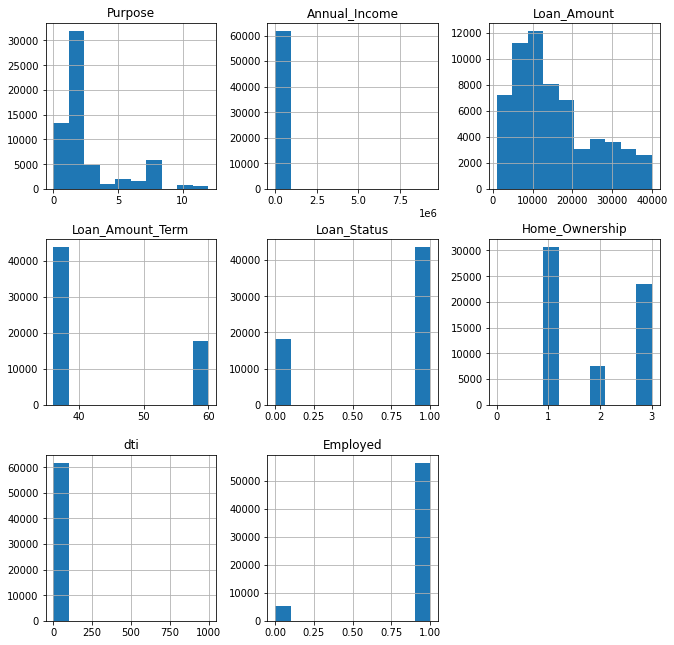

In [ ]:
df_LendingClub[df_LendingClub.dtypes[(df_LendingClub.dtypes=="float64")|(df_LendingClub.dtypes=="int64")]
                        .index.values].hist(figsize=[11,11])

The above histograms of all the numerical features helps to categorise the variable types in the dataset. The ***continuous*** (infinite values) features display a continuous distribution pattern, whilst the ***dichotomous*** (2 possible values usually 0 and 1) features have only two bars.The ***nominal*** (2 or more possible values with no meaningful order or rank) and ***ordinal*** (2 or more possible values with a meaningful order or rank) variables can sometimes be trickier to determine, and may require some further knowledge of the dataset or some specific domain knowledge 

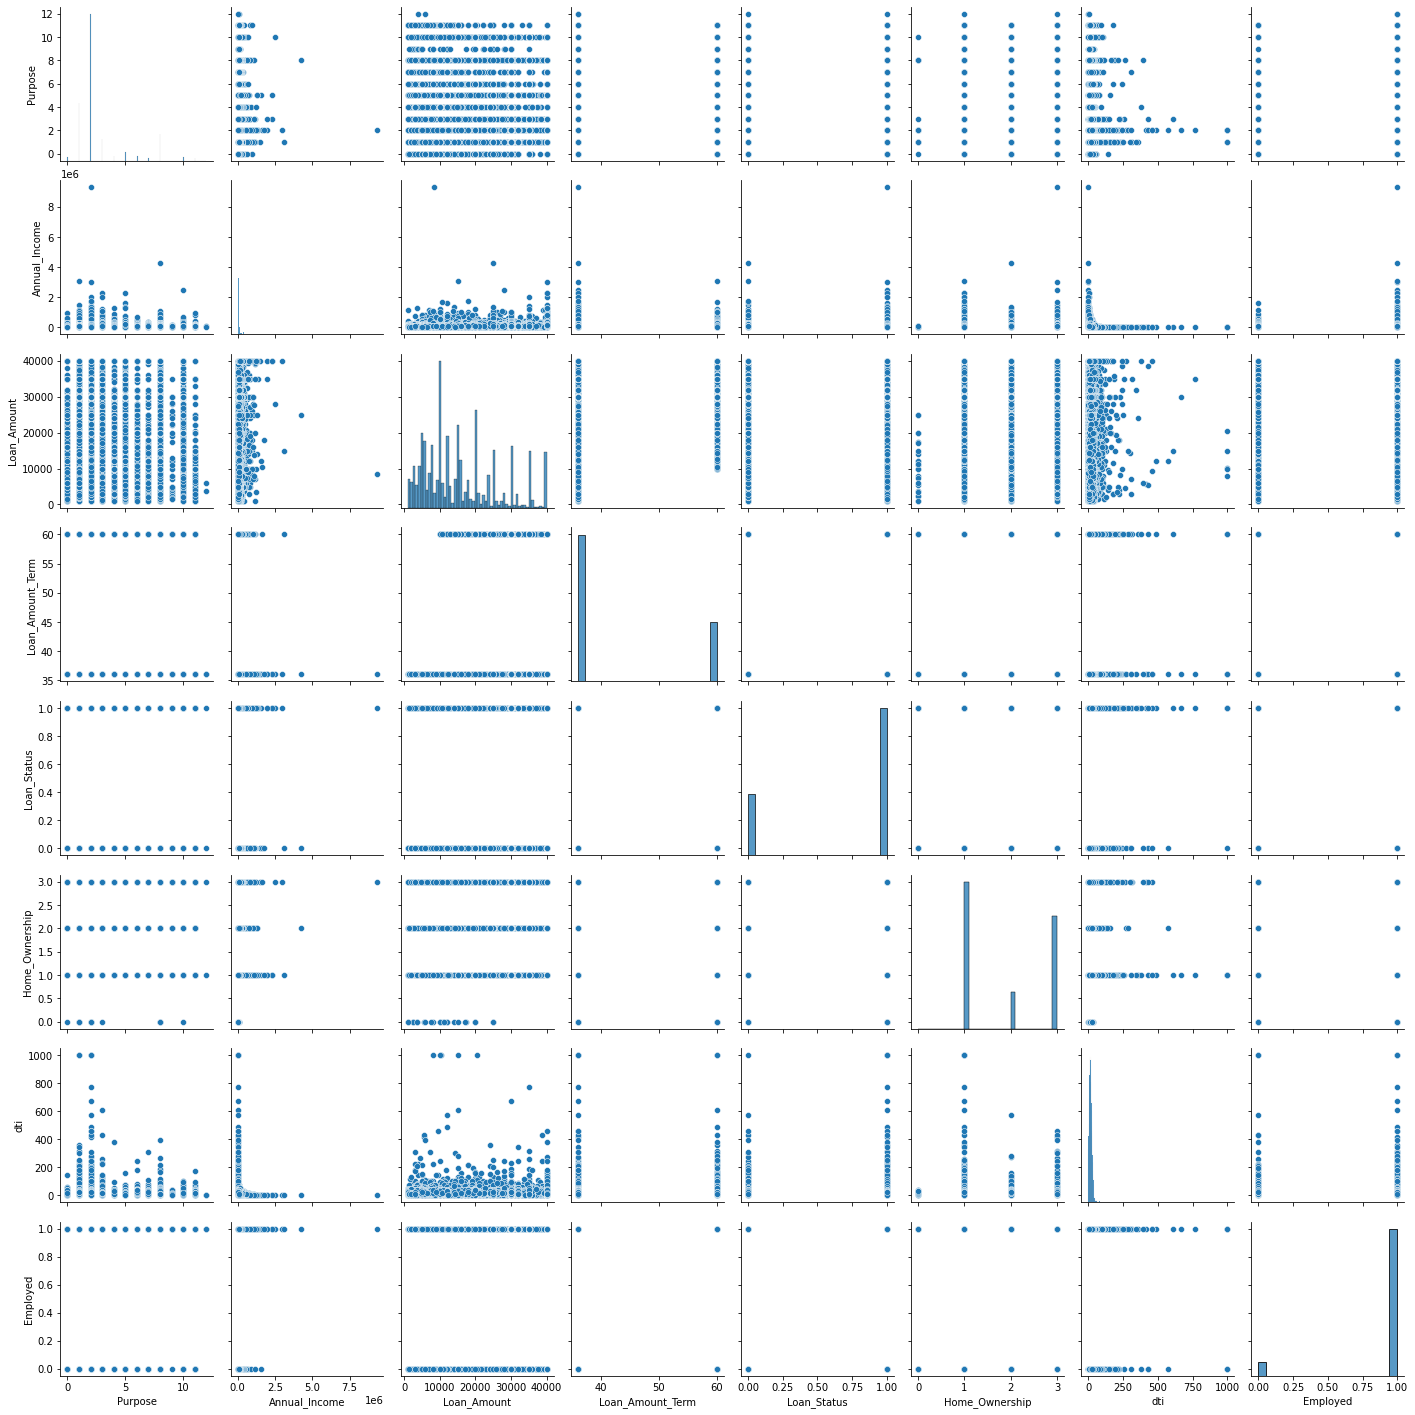

In [ ]:
seabornInstance.pairplot(df_LendingClub)

# Loan prediction Dataset

## Load Dataset

In [ ]:
path = "/content/drive/My Drive/the-feature-finders/datasets/loan-prediction/train_u6lujuX_CVtuZ9i.csv"
df_Loan = pd.read_csv(path)
df_Loan.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
# Drop unnecessary columns
df_Loan.drop(['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','Property_Area'],axis=1,inplace=True)

In [ ]:
data_dict=pd.read_excel('/content/drive/My Drive/the-feature-finders/datasets/loan-prediction/LoanPredictionProblemDescription.xlsx')

In [ ]:
data_dtypes=pd.DataFrame(df_Loan.dtypes,columns=['dtype'])
data_dtypes.reset_index(inplace=True)
data_dtypes.columns=['Variable', 'dtype']
data_dtypes['first value'] = df_Loan.loc[0].values

In [ ]:
data_col=data_dtypes.merge(data_dict, on='Variable',how='left')

In [ ]:
data_col.head(10)

,Variable,dtype,first value,Description
0,ApplicantIncome,int64,5849,Applicant income
1,CoapplicantIncome,float64,0,Coapplicant income
2,LoanAmount,float64,NaN,Loan amount in thousands
3,Loan_Amount_Term,float64,360,Term of loan in months
4,Credit_History,float64,1,credit history meets guidelines
5,Loan_Status,object,Y,Loan approved (Y/N)


## Data Cleaning

In [ ]:
df_Loan.isnull().sum()

ApplicantIncome      0 
CoapplicantIncome    0 
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Loan_Status          0 
dtype: int64

In [ ]:
# Add a new column to have the address state. We have taken this dataset from the company Dream Home Finance, based out of California.
df_Loan['Addr_State'] = 'CA'

In [ ]:
df_Loan['LoanAmount'] = df_Loan['LoanAmount'].fillna(df_Loan['LoanAmount'].mean())

In [ ]:
df_Loan['Loan_Amount_Term'] = df_Loan['Loan_Amount_Term'].fillna(df_Loan['Loan_Amount_Term'].mean())

In [ ]:
df_Loan['Credit_History'] = df_Loan['Credit_History'].fillna(0)

In [ ]:
df_Loan["Annual_Income"] = df_Loan["ApplicantIncome"] + df_Loan["CoapplicantIncome"]
df_Loan.drop(['ApplicantIncome','CoapplicantIncome'],axis=1,inplace=True)

In [ ]:
# Add a new column "Employed" as 1. Self_Employed column indicates whether the applicant is self-employed or not but we assume evey applicant is employed. 
df_Loan["Employed"] = 1

In [ ]:
# Add a new column to have the purpose converting house as '4' becuase Lending club has value as 4 for house
df_Loan['Purpose'] = 4

In [ ]:
# Add a new column for home_ownership as mortgage as '1' becuase Lending club has value as 1 for MORTGAGE
df_Loan["Home_Ownership"] = 1

In [ ]:
df_Loan['Loan_Status'] = df_Loan['Loan_Status'].replace({'Y':1,'N':0})

In [ ]:
df_Loan.head(10)

,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Addr_State,Annual_Income,Employed,Purpose,Home_Ownership
0,146.412162,360.0,1.0,1,CA,5849.0,1,4,1
1,128.000000,360.0,1.0,0,CA,6091.0,1,4,1
2,66.000000,360.0,1.0,1,CA,3000.0,1,4,1
3,120.000000,360.0,1.0,1,CA,4941.0,1,4,1
4,141.000000,360.0,1.0,1,CA,6000.0,1,4,1
5,267.000000,360.0,1.0,1,CA,9613.0,1,4,1
6,95.000000,360.0,1.0,1,CA,3849.0,1,4,1
7,158.000000,360.0,0.0,0,CA,5540.0,1,4,1
8,168.000000,360.0,1.0,1,CA,5532.0,1,4,1
9,349.000000,360.0,1.0,0,CA,23809.0,1,4,1


In [ ]:
df_Loan.rename(columns={ 'LoanAmount': 'Loan_Amount'}, inplace=True)

## Data Visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3258f15ef0>,
      dtype=object)

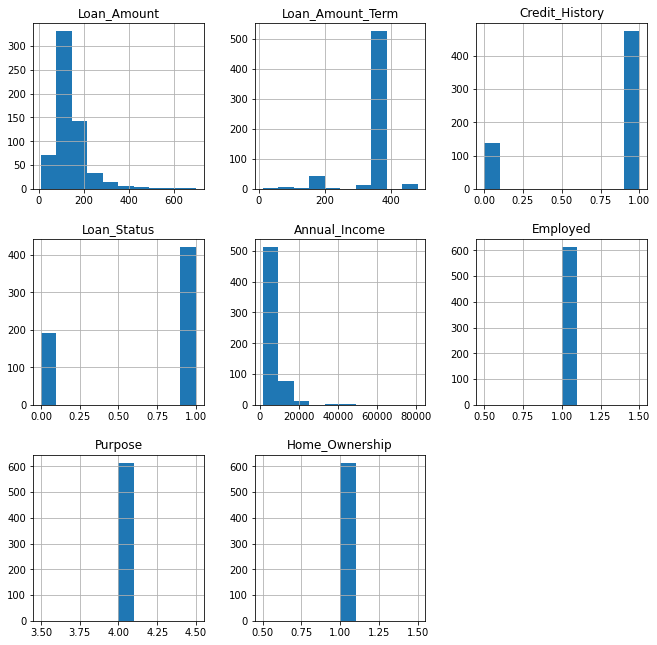

In [ ]:
df_Loan[df_Loan.dtypes[(df_Loan.dtypes=="float64")|(df_Loan.dtypes=="int64")]
                        .index.values].hist(figsize=[11,11])

The above histograms of all the numerical features helps to categorise the variable types in the dataset. The ***continuous*** (infinite values) features display a continuous distribution pattern, whilst the ***dichotomous*** (2 possible values usually 0 and 1) features have only two bars.The ***nominal*** (2 or more possible values with no meaningful order or rank) and ***ordinal*** (2 or more possible values with a meaningful order or rank) variables can sometimes be trickier to determine, and may require some further knowledge of the dataset or some specific domain knowledge 

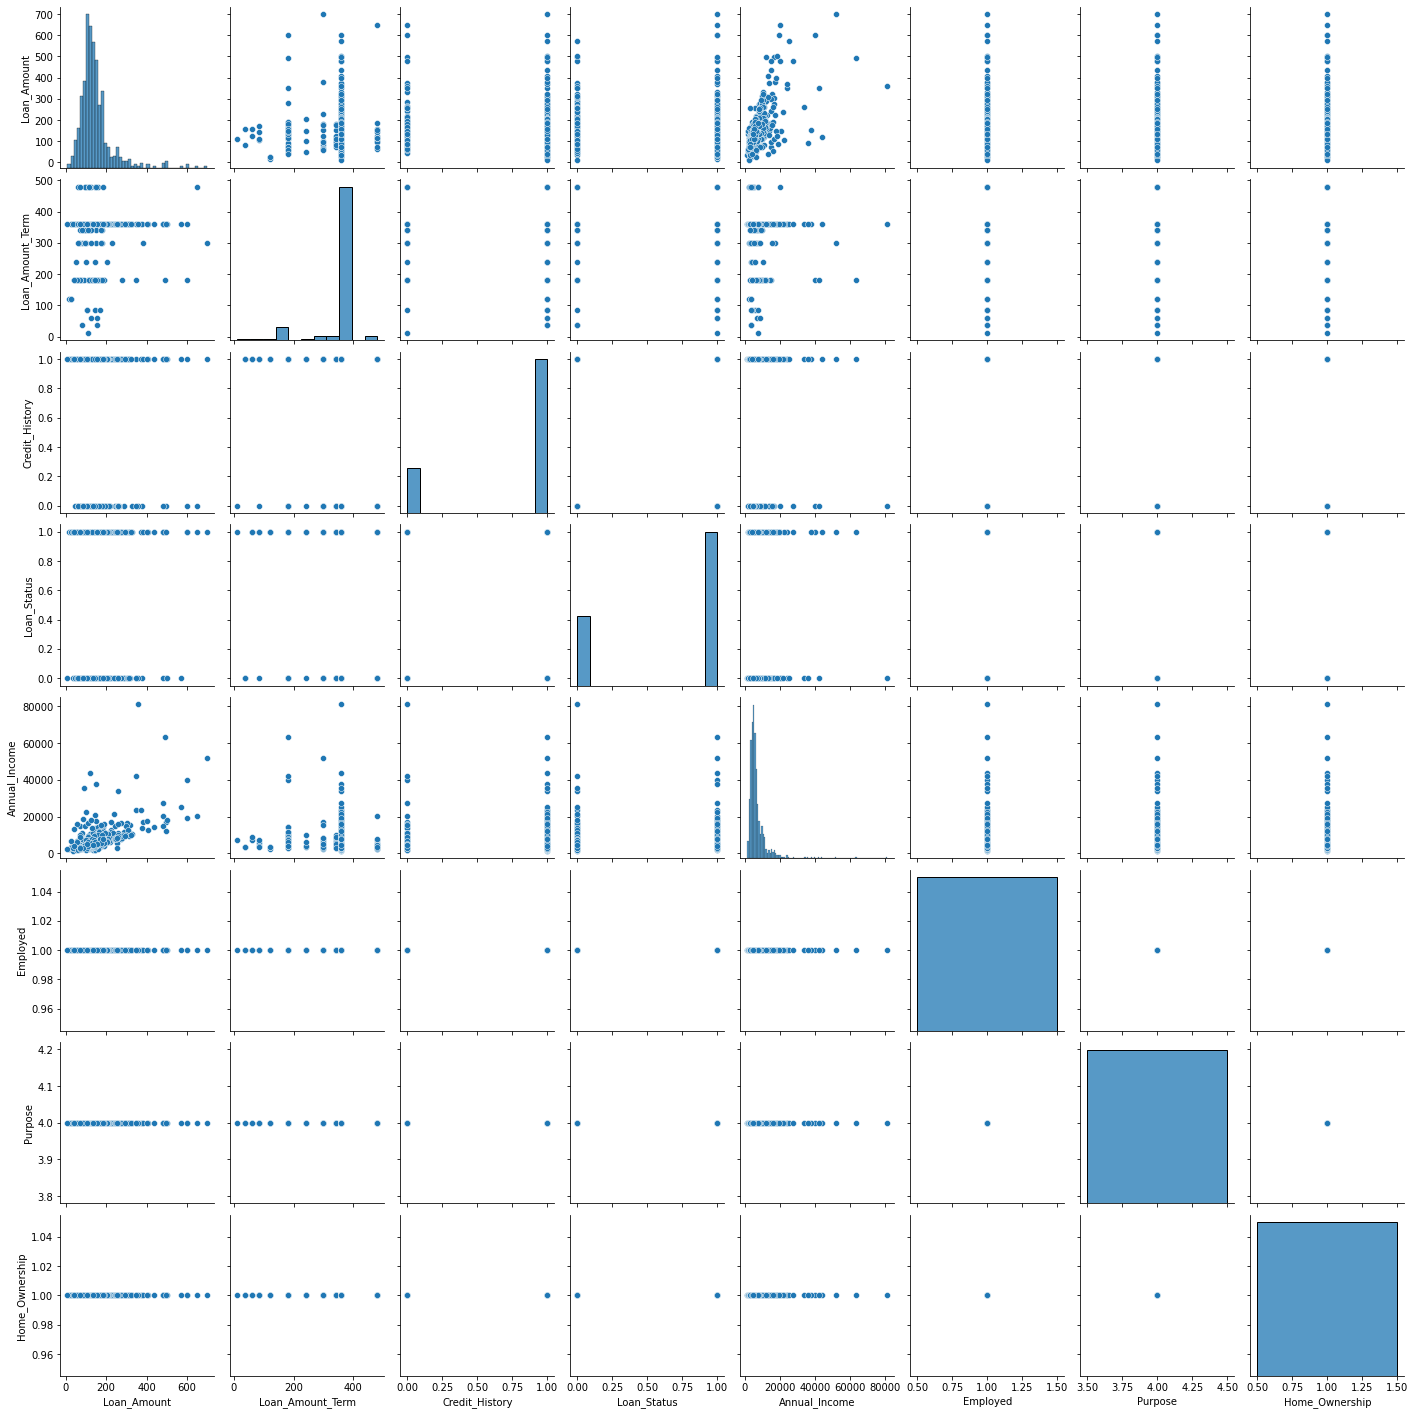

In [ ]:
seabornInstance.pairplot(df_Loan)

# Data Imputation

## Credit History

Applying Logistic Regression to predict the Credit History data from Loan Prediction Problem dataset and create a new fetaure in Lending Club dataset.

### Loan Prediction Problem Dataset

In [ ]:
X = df_Loan[['Loan_Amount', 'Annual_Income', 'Loan_Status']]
print(X.columns)
y = df_Loan['Credit_History'].values

Index(['Loan_Amount', 'Annual_Income', 'Loan_Status'], dtype='object')


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
classifier = MLPClassifier(random_state=1, max_iter=300)
classifier.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=300,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 1 24]
 [ 1 97]]
              precision    recall  f1-score   support

         0.0       0.50      0.04      0.07        25
         1.0       0.80      0.99      0.89        98

    accuracy                           0.80       123
   macro avg       0.65      0.51      0.48       123
weighted avg       0.74      0.80      0.72       123



### Lending Club Dataset

In [ ]:
X_new = df_LendingClub[['Loan_Amount', 'Annual_Income', 'Loan_Status']]
print(X.columns)

Index(['Loan_Amount', 'Annual_Income', 'Loan_Status'], dtype='object')


In [ ]:
CreditHistory_pred = classifier.predict(X_new)

In [ ]:
df_LendingClub['Credit_History'] = CreditHistory_pred

In [ ]:
df_LendingClub.Credit_History.value_counts()

0.0    58849
1.0    3065 
Name: Credit_History, dtype: int64

## dti

Applying Linear Regression to predict the dti (debt income ratio) data from Lending Club dataset and create a new fetaure in Loan Prediction Problem dataset.

### Lending Club Dataset

Performing Linear Regression to predict the Debt-to-Income Ratio based on Applicant Income, Loan Amount, and Loan Term

In [ ]:
X = df_LendingClub[['Annual_Income', 'Loan_Amount', 'Loan_Amount_Term']]

In [ ]:
y = df_LendingClub['dti']

In [ ]:
# Replace values over 200 with 200
df_LendingClub.loc[df_LendingClub['dti'] > 200, 'dti'] = 200

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1,test_size=0.30)

In [ ]:
regr = LinearRegression()
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)

### Loan Predcition Problem Dataset

Apply Linear Regression Model to Loan Data Set to Predict DTI

In [ ]:
X = df_Loan[['Annual_Income', 'Loan_Amount', 'Loan_Amount_Term']]

In [ ]:
predicted_y = regr.predict(X)

In [ ]:
df_Loan['dti'] = predicted_y

In [ ]:
df_Loan['dti'].describe()

count    614.000000
mean     29.826567 
std      2.357156  
min      17.816175 
25%      30.403907 
50%      30.511301 
75%      30.547085 
max      34.958430 
Name: dti, dtype: float64

# Data Amalgamation

In [ ]:
# Create a new final dataframe combining both the dataframes
final_df = pd.concat([df_Loan,df_LendingClub], axis=0, ignore_index=True)

In [ ]:
final_df.head(10)

,Loan_Amount,Loan_Amount_Term,Credit_History,Loan_Status,Addr_State,Annual_Income,Employed,Purpose,Home_Ownership,dti
0,146.412162,360.0,1.0,1,CA,5849.0,1,4,1,30.510709
1,128.000000,360.0,1.0,0,CA,6091.0,1,4,1,30.503228
2,66.000000,360.0,1.0,1,CA,3000.0,1,4,1,30.577049
3,120.000000,360.0,1.0,1,CA,4941.0,1,4,1,30.531795
4,141.000000,360.0,1.0,1,CA,6000.0,1,4,1,30.506485
5,267.000000,360.0,1.0,1,CA,9613.0,1,4,1,30.424111
6,95.000000,360.0,1.0,1,CA,3849.0,1,4,1,30.557648
7,158.000000,360.0,0.0,0,CA,5540.0,1,4,1,30.519388
8,168.000000,360.0,1.0,1,CA,5532.0,1,4,1,30.520322
9,349.000000,360.0,1.0,0,CA,23809.0,1,4,1,30.070256


In [ ]:
final_df.tail(10)

,Loan_Amount,Loan_Amount_Term,Credit_History,Loan_Status,Addr_State,Annual_Income,Employed,Purpose,Home_Ownership,dti
62518,6000.0,36.0,0.0,1,MI,68000.0,1,1,1,20.88
62519,30000.0,36.0,0.0,1,MT,64577.0,1,1,1,20.29
62520,25000.0,60.0,0.0,1,OH,110000.0,1,2,1,21.05
62521,6500.0,36.0,0.0,1,WA,26000.0,1,2,3,14.68
62522,14400.0,60.0,0.0,0,CT,45000.0,1,8,3,7.55
62523,35000.0,36.0,0.0,1,OK,100000.0,1,8,1,11.95
62524,12300.0,36.0,0.0,1,UT,112000.0,1,2,1,4.31
62525,9000.0,36.0,0.0,0,CA,85000.0,1,1,3,23.45
62526,5000.0,36.0,0.0,1,VA,32000.0,1,2,1,24.12
62527,3000.0,36.0,0.0,0,NJ,72000.0,1,8,3,5.87


## Data Visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f326bb90fd0>,
      dtype=object)

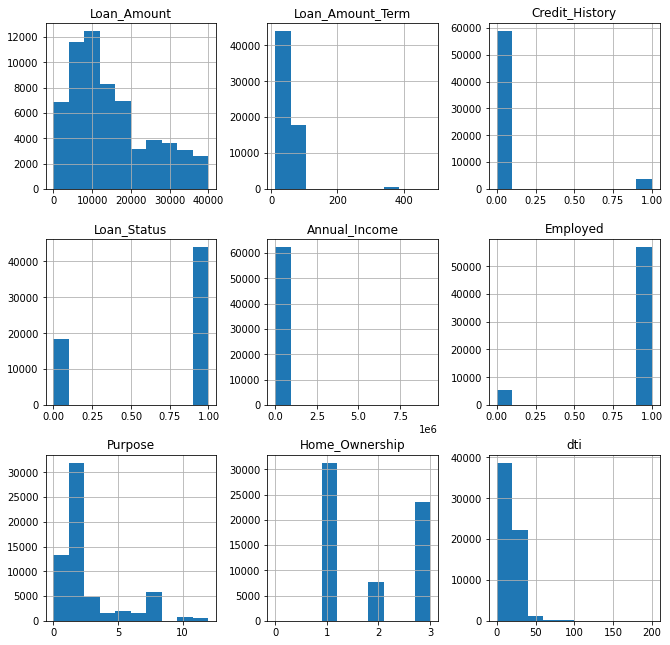

In [ ]:
final_df[final_df.dtypes[(final_df.dtypes=="float64")|(final_df.dtypes=="int64")]
                        .index.values].hist(figsize=[11,11])

In [ ]:
def draw_graph(col_name):
  fig, axs = plt.subplots(1,2,figsize=(14,7))
  sns.countplot(x=col_name,data=final_df,ax=axs[0])
  axs[0].set_title("Frequency of each " + col_name)
  final_df[col_name].value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],autopct='%1.2f%%')
  axs[1].set_title("Percentage of each " + col_name)
  plt.show()

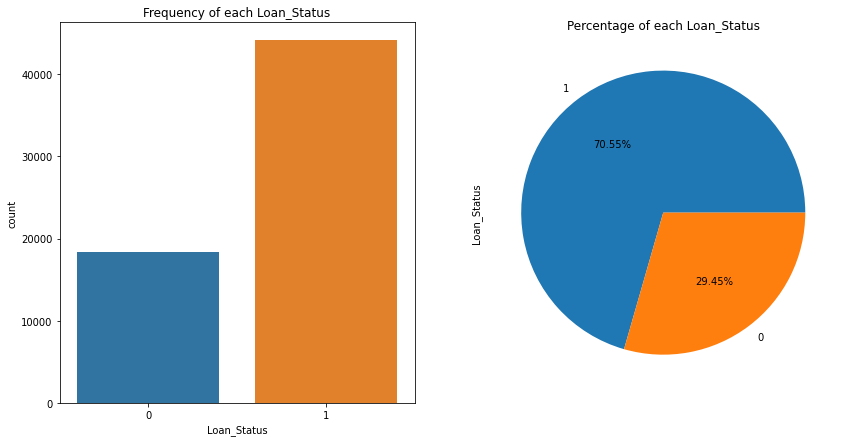

In [ ]:
draw_graph('Loan_Status')

In [ ]:
for index, ele in enumerate(list_purpose):
  print(index,ele)

0 car
1 credit_card
2 debt_consolidation
3 home_improvement
4 house
5 major_purchase
6 medical
7 moving
8 other
9 renewable_energy
10 small_business
11 vacation


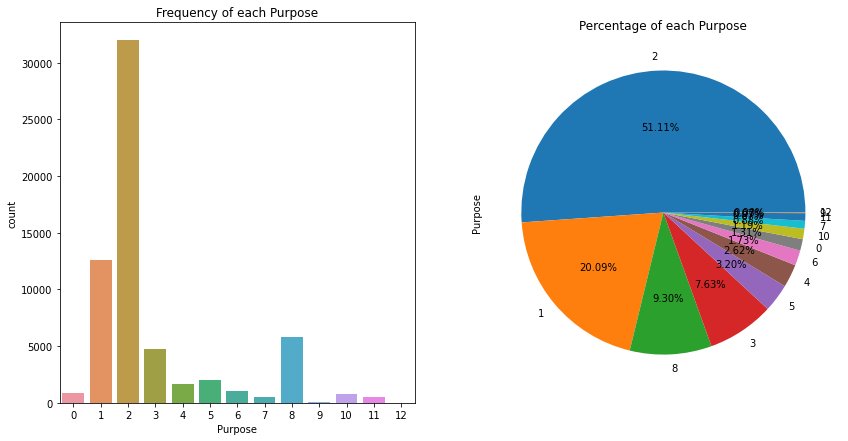

In [ ]:
draw_graph('Purpose')

In [ ]:
for index, ele in enumerate(list_house):
  print(index,ele)

0 ANY
1 MORTGAGE
2 OWN
3 RENT


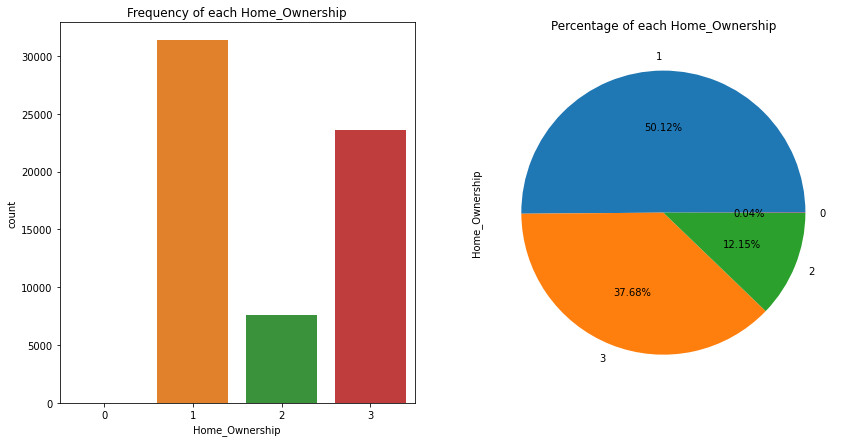

In [ ]:
draw_graph('Home_Ownership')

Run the below cell to download the final dataset as a csv file. The file will be downloaded into your loacl machine. Please note it will also add the first column with the serial numbers so we can delete that column and use this csv file as our final dataset to perform further algorithms.

In [ ]:
# Downloads the file in local machine
# from google.colab import files
# final_df.to_csv('BankLoanApprovalFinalDataset.csv')
# files.download('BankLoanApprovalFinalDataset.csv')

Run the below cells to export the dataframe as a google sheet. After execution of these cells, please check your drive for the file.

In [ ]:
#Export to Google Sheet

# !pip install --upgrade --quiet gspread
# from google.colab import auth
# auth.authenticate_user()

# import gspread
# from oauth2client.client import GoogleCredentials

# gc = gspread.authorize(GoogleCredentials.get_application_default())

In [ ]:
# from gspread_dataframe import get_as_dataframe, set_with_dataframe

# sh = gc.create('BankLoanApprovalFinalDataset')
# worksheet = gc.open('BankLoanApprovalFinalDataset').sheet1

# set_with_dataframe(worksheet,final_df)

# Beautiful Soup

## Import Libraries

In [ ]:
import requests
import urllib.request
import pandas as pd
import csv
from csv import writer
from csv import reader
from bs4 import BeautifulSoup
!pip install us   #for US states abbreviations
import us

     |████████████████████████████████| 133kB 4.4MB/s 
  Created wheel for us: filename=us-2.0.2-cp36-none-any.whl size=11928 sha256=a251e36530cc001cdaafe127d5d753f97c9b2caa9f7399a41b084d8d05ff3283
  Stored in directory: /root/.cache/pip/wheels/e2/16/45/6453383ffa495670f0f6b80a3e697a9771d98cfbaf8b451e73
  Created wheel for jellyfish: filename=jellyfish-0.6.1-cp36-cp36m-linux_x86_64.whl size=74740 sha256=bd51731657dafd7f70ed6ea667f2d94ac4f8504eb23edb3ac4a85cdae0ad47f0
  Stored in directory: /root/.cache/pip/wheels/9c/6f/33/92bb9a4b4562a60ba6a80cedbab8907e48bc7a8b1f369ea0ae
Successfully built us jellyfish


## Download the URL which we want scrape

In [ ]:
page = requests.get("https://www.worldatlas.com/articles/us-states-with-the-most-debt.html")
page

<Response [200]>

In [ ]:
page.status_code

200

In [ ]:
page.content

b'\n\n\n\n\n<!DOCTYPE html>\n<html lang="en-US">\n    <head>\n        <meta http-equiv="Content-Type" content="text/html; charset=UTF-8"/>\n        <meta name="viewport" content="user-scalable=yes, initial-scale=1.0, width=device-width"/>\n\n                    <link rel="canonical" href="https://www.worldatlas.com/articles/us-states-with-the-most-debt.html"/>\n        \n                    <meta name="description" content="California carries the most debt out of any state, followed by New York and Massachusetts.">\n        \n        \n        \n        <link rel="icon" href="/nwa_assets/img/site/favicon.png" type="image/x-icon">\n\n                                <link rel="amphtml" href="https://www.worldatlas.com/amp/articles/us-states-with-the-most-debt.html">\n            <title>US States With the Most Debt - WorldAtlas</title>\n\n                    <meta property="og:title" content="US States With the Most Debt"/>\n                    <meta property="og:type" content="article"/>

## Parsing a page with BeautifulSoup

In [ ]:
soup = BeautifulSoup(page.content, 'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<html lang="en-US">
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="user-scalable=yes, initial-scale=1.0, width=device-width" name="viewport"/>
  <link href="https://www.worldatlas.com/articles/us-states-with-the-most-debt.html" rel="canonical"/>
  <meta content="California carries the most debt out of any state, followed by New York and Massachusetts." name="description"/>
  <link href="/nwa_assets/img/site/favicon.png" rel="icon" type="image/x-icon"/>
  <link href="https://www.worldatlas.com/amp/articles/us-states-with-the-most-debt.html" rel="amphtml"/>
  <title>
   US States With the Most Debt - WorldAtlas
  </title>
  <meta content="US States With the Most Debt" property="og:title">
   <meta content="article" property="og:type"/>
   <meta content="https://www.worldatlas.com/r/w2000-h1125-q90/upload/92/ee/89/shutterstock-1223596246.jpg" property="og:image"/>
   <meta content="2000" property="og:image:width:"/>
   <meta

In [ ]:
list(soup.children)

['\n', 'html', '\n', <html lang="en-US">
 <head>
 <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
 <meta content="user-scalable=yes, initial-scale=1.0, width=device-width" name="viewport"/>
 <link href="https://www.worldatlas.com/articles/us-states-with-the-most-debt.html" rel="canonical"/>
 <meta content="California carries the most debt out of any state, followed by New York and Massachusetts." name="description"/>
 <link href="/nwa_assets/img/site/favicon.png" rel="icon" type="image/x-icon"/>
 <link href="https://www.worldatlas.com/amp/articles/us-states-with-the-most-debt.html" rel="amphtml"/>
 <title>US States With the Most Debt - WorldAtlas</title>
 <meta content="US States With the Most Debt" property="og:title">
 <meta content="article" property="og:type"/>
 <meta content="https://www.worldatlas.com/r/w2000-h1125-q90/upload/92/ee/89/shutterstock-1223596246.jpg" property="og:image"/>
 <meta content="2000" property="og:image:width:"/>
 <meta content="1125" pr

##  Extract the table

In [ ]:
table = soup.find(id="article_table")
print(table.prettify())

<div class="mod_excess excess_show_desktop" id="article_table">
 <table data-role="table">
  <thead>
   <tr>
    <th>
     Rank
    </th>
    <th>
     ﻿State
    </th>
    <th>
     Debt Total (Billions)
    </th>
   </tr>
  </thead>
  <tbody>
   <tr>
    <td>
     1
    </td>
    <td>
     California
    </td>
    <td>
     $152.80
    </td>
   </tr>
   <tr>
    <td>
     2
    </td>
    <td>
     New York
    </td>
    <td>
     $139.20
    </td>
   </tr>
   <tr>
    <td>
     3
    </td>
    <td>
     Massachusetts
    </td>
    <td>
     $77.00
    </td>
   </tr>
   <tr>
    <td>
     4
    </td>
    <td>
     New Jersey
    </td>
    <td>
     $65.90
    </td>
   </tr>
   <tr>
    <td>
     5
    </td>
    <td>
     Illinois
    </td>
    <td>
     $61.80
    </td>
   </tr>
   <tr>
    <td>
     6
    </td>
    <td>
     Texas
    </td>
    <td>
     $51.00
    </td>
   </tr>
   <tr>
    <td>
     7
    </td>
    <td>
     Pennsylvania
    </td>
    <td>
     $47.50
    </td>
   

## Finding all instances of a tr tag at once

In [ ]:
tr = table.findAll(['tr'])
print(tr)

[<tr><th>Rank</th><th>﻿State </th><th>Debt Total (Billions)</th></tr>, <tr><td>1</td><td>California</td><td>$152.80 </td></tr>, <tr><td>2</td><td>New York</td><td>$139.20 </td></tr>, <tr><td>3</td><td>Massachusetts</td><td>$77.00 </td></tr>, <tr><td>4</td><td>New Jersey</td><td>$65.90 </td></tr>, <tr><td>5</td><td>Illinois</td><td>$61.80 </td></tr>, <tr><td>6</td><td>Texas</td><td>$51.00 </td></tr>, <tr><td>7</td><td>Pennsylvania</td><td>$47.50 </td></tr>, <tr><td>8</td><td>Connecticut</td><td>$38.80 </td></tr>, <tr><td>9</td><td>Michigan</td><td>$33.50 </td></tr>, <tr><td>10</td><td>Ohio</td><td>$33.50 </td></tr>, <tr><td>11</td><td>Washington</td><td>$33.40 </td></tr>, <tr><td>12</td><td>Florida</td><td>$28.80 </td></tr>, <tr><td>13</td><td>Maryland</td><td>$28.00 </td></tr>, <tr><td>14</td><td>Virginia</td><td>$27.80 </td></tr>, <tr><td>15</td><td>Wisconsin</td><td>$23.30 </td></tr>, <tr><td>16</td><td>Indiana</td><td>$21.80 </td></tr>, <tr><td>17</td><td>Missouri</td><td>$18.40 </t

## Store the data in the csv format

In [ ]:
csvFile = open("usStatesWithMostDebt.csv",'wt',newline='',encoding='utf-8')
writer = csv.writer(csvFile)  
try:   
        for cell in tr:
            th = cell.find_all('th')
            th_data = [col.text.strip('\n') for col in th]
            td = cell.find_all('td')
            row = [i.text.replace('\n','') for i in td]
            writer.writerow(th_data+row)      
        
finally:   
    csvFile.close()

In [ ]:
datadf = pd.read_csv("usStatesWithMostDebt.csv")
datadf

,Rank,﻿State,Debt Total (Billions)
0,1,California,$152.80
1,2,New York,$139.20
2,3,Massachusetts,$77.00
3,4,New Jersey,$65.90
4,5,Illinois,$61.80
5,6,Texas,$51.00
6,7,Pennsylvania,$47.50
7,8,Connecticut,$38.80
8,9,Michigan,$33.50
9,10,Ohio,$33.50


## Adding US states abbreviations column in the csv

In [ ]:
#testing the imported library
state = us.states.lookup('Maryland')
state.abbr

'MD'

In [ ]:
# Open the input_file in read mode and output_file in write mode
with open('usStatesWithMostDebt.csv', 'r') as read_obj, \
        open('usStatesWithMostDebtAbbr.csv', 'w', newline='') as write_obj:
    # Create a csv.reader object from the input file object
    csv_reader = reader(read_obj)
    # Create a csv.writer object from the output file object
    csv_writer = csv.writer(write_obj)
    # Read each row of the input csv file as list
    for row in csv_reader:
        #print(row)
        if row[1] == '\ufeffState ':
          state_abbr = 'Addr_State'
        else:
          #print(row[1])
          state = us.states.lookup(row[1])
          print(state)
          state_abbr = state.abbr
          print(state_abbr)
        row.append(state_abbr)
        csv_writer.writerow(row)


California
CA
New York
NY
Massachusetts
MA
New Jersey
NJ
Illinois
IL
Texas
TX
Pennsylvania
PA
Connecticut
CT
Michigan
MI
Ohio
OH
Washington
WA
Florida
FL
Maryland
MD
Virginia
VA
Wisconsin
WI
Indiana
IN
Missouri
MO
Louisiana
LA
Colorado
CO
Minnesota
MN
North Carolina
NC
South Carolina
SC
Kentucky
KY
Arizona
AZ
Georgia
GA
Oregon
OR
Hawaii
HI
Rhode Island
RI
Alabama
AL
Oklahoma
OK
New Hampshire
NH
Kansas
KS
Mississippi
MS
Utah
UT
West Virginia
WV
New Mexico
NM
Iowa
IA
Tennessee
TN
Alaska
AK
Arkansas
AR
Maine
ME
Delaware
DE
South Dakota
SD
Vermont
VT
Idaho
ID
Nevada
NV
North Dakota
ND
Montana
MT
Nebraska
NE
Wyoming
WY


In [ ]:
datadf1 = pd.read_csv("usStatesWithMostDebtAbbr.csv")
datadf1

,Rank,﻿State,Debt Total (Billions),Addr_State
0,1,California,$152.80,CA
1,2,New York,$139.20,NY
2,3,Massachusetts,$77.00,MA
3,4,New Jersey,$65.90,NJ
4,5,Illinois,$61.80,IL
5,6,Texas,$51.00,TX
6,7,Pennsylvania,$47.50,PA
7,8,Connecticut,$38.80,CT
8,9,Michigan,$33.50,MI
9,10,Ohio,$33.50,OH


## Data Enrichment
Adding the scrape data into final dataset

In [ ]:
final_df.head(2)

,Loan_Amount,Loan_Amount_Term,Credit_History,Loan_Status,Addr_State,Annual_Income,Employed,Purpose,Home_Ownership,dti
0,146.412162,360.0,1.0,1,CA,5849.0,1,4,1,30.510709
1,128.000000,360.0,1.0,0,CA,6091.0,1,4,1,30.503228


In [ ]:
merge_state = pd.merge(final_df, datadf1, on="Addr_State",how="left")
merge_state.head(15)

,Loan_Amount,Loan_Amount_Term,Credit_History,Loan_Status,Addr_State,Annual_Income,Employed,Purpose,Home_Ownership,dti,Rank,﻿State,Debt Total (Billions)
0,146.412162,360.0,1.0,1,CA,5849.0,1,4,1,30.510709,1.0,California,$152.80
1,128.000000,360.0,1.0,0,CA,6091.0,1,4,1,30.503228,1.0,California,$152.80
2,66.000000,360.0,1.0,1,CA,3000.0,1,4,1,30.577049,1.0,California,$152.80
3,120.000000,360.0,1.0,1,CA,4941.0,1,4,1,30.531795,1.0,California,$152.80
4,141.000000,360.0,1.0,1,CA,6000.0,1,4,1,30.506485,1.0,California,$152.80
5,267.000000,360.0,1.0,1,CA,9613.0,1,4,1,30.424111,1.0,California,$152.80
6,95.000000,360.0,1.0,1,CA,3849.0,1,4,1,30.557648,1.0,California,$152.80
7,158.000000,360.0,0.0,0,CA,5540.0,1,4,1,30.519388,1.0,California,$152.80
8,168.000000,360.0,1.0,1,CA,5532.0,1,4,1,30.520322,1.0,California,$152.80
9,349.000000,360.0,1.0,0,CA,23809.0,1,4,1,30.070256,1.0,California,$152.80


In [ ]:
merge_state.tail(25)

,Loan_Amount,Loan_Amount_Term,Credit_History,Loan_Status,Addr_State,Annual_Income,Employed,Purpose,Home_Ownership,dti,Rank,﻿State,Debt Total (Billions)
62503,15000.0,36.0,0.0,1,NY,80000.0,1,1,1,33.36,2.0,New York,$139.20
62504,14000.0,36.0,0.0,1,OR,70000.0,1,1,3,22.08,26.0,Oregon,$12.70
62505,8000.0,36.0,0.0,1,CA,55000.0,1,2,3,17.50,1.0,California,$152.80
62506,9200.0,36.0,0.0,1,WI,60000.0,1,2,1,16.28,15.0,Wisconsin,$23.30
62507,35000.0,36.0,0.0,0,MN,197000.0,1,2,1,3.94,20.0,Minnesota,$16.40
62508,12000.0,36.0,0.0,0,MI,57000.0,1,2,3,16.65,9.0,Michigan,$33.50
62509,10000.0,36.0,0.0,1,FL,46238.0,0,1,3,33.99,12.0,Florida,$28.80
62510,30000.0,36.0,0.0,1,VA,67000.0,0,2,2,25.62,14.0,Virginia,$27.80
62511,8000.0,36.0,0.0,0,IN,65000.0,1,6,1,38.22,16.0,Indiana,$21.80
62512,10500.0,36.0,0.0,1,CA,108500.0,1,2,3,15.72,1.0,California,$152.80


In [ ]:
merge_state.isnull().sum()

Loan_Amount              0  
Loan_Amount_Term         0  
Credit_History           0  
Loan_Status              0  
Addr_State               0  
Annual_Income            0  
Employed                 0  
Purpose                  0  
Home_Ownership           0  
dti                      0  
Rank                     136
﻿State                   136
Debt Total (Billions)    136
dtype: int64

In [ ]:
merge_state.dropna(subset=['Rank'], inplace=True)

# Export final dataset into a csv file

Run the below cell to download the final dataset as a csv file. The file will be downloaded into your loacl machine. Please note it will also add the first column with the serial numbers so we can delete that column and use this csv file as our final dataset to perform further algorithms.

In [ ]:
# Downloads the file in local machine
from google.colab import files
merge_state.to_csv('BankLoanApprovalFinalMergedDataset.csv')
files.download('BankLoanApprovalFinalMergedDataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Latent Variable

In [ ]:
df = merge_state[['Loan_Amount','Loan_Amount_Term','Credit_History','Loan_Status','Annual_Income','Employed','Purpose','Home_Ownership','dti','Rank']]
df.head(5)

,Loan_Amount,Loan_Amount_Term,Credit_History,Loan_Status,Annual_Income,Employed,Purpose,Home_Ownership,dti,Rank
0,146.412162,360.0,1.0,1,5849.0,1,4,1,30.510709,1.0
1,128.000000,360.0,1.0,0,6091.0,1,4,1,30.503228,1.0
2,66.000000,360.0,1.0,1,3000.0,1,4,1,30.577049,1.0
3,120.000000,360.0,1.0,1,4941.0,1,4,1,30.531795,1.0
4,141.000000,360.0,1.0,1,6000.0,1,4,1,30.506485,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62392 entries, 0 to 62527
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Loan_Amount       62392 non-null  float64
 1   Loan_Amount_Term  62392 non-null  float64
 2   Credit_History    62392 non-null  float64
 3   Loan_Status       62392 non-null  int64  
 4   Annual_Income     62392 non-null  float64
 5   Employed          62392 non-null  int64  
 6   Purpose           62392 non-null  int64  
 7   Home_Ownership    62392 non-null  int64  
 8   dti               62392 non-null  float64
 9   Rank              62392 non-null  float64
dtypes: float64(6), int64(4)
memory usage: 5.2 MB


## Fractal clustering

Evaluated performance of various number of clusters using K-Means.
Performance is evaluated by within cluster SSE and silhouette score.

In [ ]:
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
from sklearn import metrics

In [ ]:
def plot_cluster(df, max_loop=50):
    """
    Looking at the performance of various number of clusters using K-Means.
    Performance is evaluated by within cluster SSE and silhouette score.
    """
    try:
        df.drop('cluster', axis=1, inplace=True)
    except:
        next
    X = df.iloc[:,[3,8]]
    
    # robust scaling is used so that the centering and scaling statistics are therefore not influenced by a few number of very large marginal outliers as they are based on percentiles
    rb = RobustScaler()
    X_rb = rb.fit_transform(X)
    
    sse_within_cluster = {}
    silhouette_score = {}
    
    for k in range(2, max_loop):
        kmeans = KMeans(n_clusters=k,  random_state=10, n_init=10, n_jobs=-1)
        kmeans.fit(X_rb)
        sse_within_cluster[k] = kmeans.inertia_
        silhouette_score[k] = metrics.silhouette_score(X_rb, kmeans.labels_, random_state=10)

    _ = plt.figure(figsize=(10,6))
    ax1 = plt.subplot(211)
    _ = plt.plot(list(sse_within_cluster.keys()), list(sse_within_cluster.values()))
    _ = plt.xlabel("Number of Clusters")
    _ = plt.ylabel("SSE Within Cluster")
    _ = plt.title("Within Cluster SSE After K-Means Clustering")
    _ = plt.xticks([i for i in range(2, max_loop)], rotation=75)
    
    ax2 = plt.subplot(212)
    _ = plt.plot(list(silhouette_score.keys()), list(silhouette_score.values()))
    _ = plt.xlabel("Number of Clusters")
    _ = plt.ylabel("Silhouette Score")
    _ = plt.title("Silhouette Score After K-Means Clustering")
    _ = plt.xticks([i for i in range(2, max_loop)], rotation=75)
    
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5, wspace=0.35)

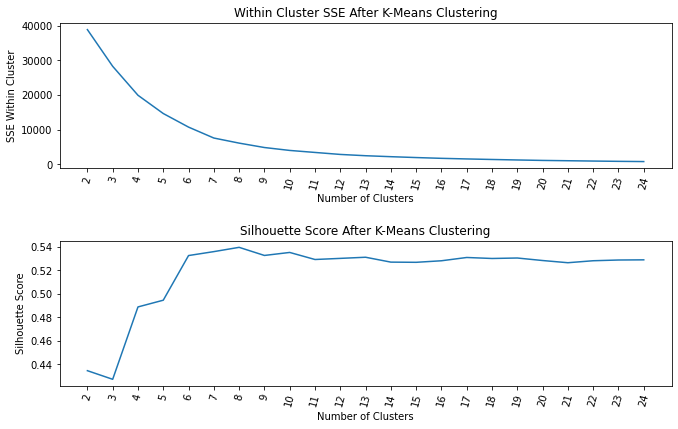

In [ ]:

plot_cluster(df, max_loop=25)

From SSE and Silhouette score, We found that the optimal number clusters are 10. 

In [ ]:
def apply_cluster(df, clusters=2):
    """
    Applying K-Means with the optimal number of clusters identified
    """
    try:
        df.drop('cluster', axis=1, inplace=True)
    except:
        next
    X = df.iloc[:,[3,8]]
    rb = RobustScaler()
    X_rb = rb.fit_transform(X)
    kmeans = KMeans(n_clusters=clusters, random_state=10, n_init=10, n_jobs=-1)  
    kmeans.fit(X_rb) 
    score = metrics.silhouette_score(X_rb, kmeans.labels_, random_state=10)
    df['cluster'] = kmeans.labels_
    sse_within_cluster = kmeans.inertia_
    
    print("clustering performance")
    print("-----------------------------------")
    print("silhouette score: " + str(score.round(2)))
    print("sse withing cluster: " + str(sse_within_cluster.round()))
    
    return df

First Trial: 10 clusters

In [ ]:

first_trial = apply_cluster(df, clusters=10)

clustering performance
-----------------------------------
silhouette score: 0.54
sse withing cluster: 4033.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [ ]:

cluster_perf_df = (
    first_trial
    .groupby('cluster')
    .agg({"dti":"mean", "Loan_Status":"mean"})
    .sort_values('dti')
    .reset_index()
)

cluster_perf_df

,cluster,dti,Loan_Status
0,0,6.044306,1.000000
1,5,7.543760,0.000000
2,7,14.332248,1.000000
3,2,18.737486,0.000000
4,1,22.337542,1.000000
5,8,30.808206,0.000000
6,4,32.138213,1.000000
7,9,52.720379,0.614331
8,3,89.118038,0.598086
9,6,186.075493,0.605634


Chose cluster 0 for fractal clustering having loan_status as approved with dti value <= 6.

In [ ]:
df_sub = df.query("cluster == 0").reset_index(drop=True)

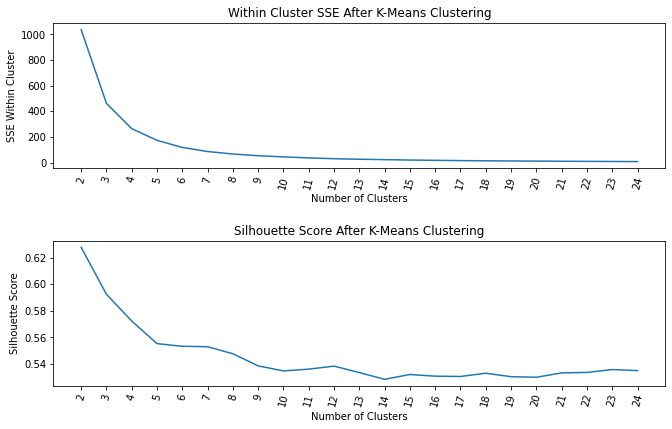

In [ ]:
plot_cluster(df_sub, max_loop=25)

From SSE and silhouette score, we found that the cluster 0 can be divided into 7 more clusters.

So Second trial on cluster 0 with 7 clusters.

In [ ]:

second_trial= apply_cluster(df_sub, clusters=7)

clustering performance
-----------------------------------
silhouette score: 0.55
sse withing cluster: 86.0


In [ ]:
sub_cluster_perf_df = (
    second_trial
    .groupby('cluster')
    .agg({"dti":"mean", "Loan_Status":"mean"})
    .sort_values('dti')
    .reset_index()
)

sub_cluster_perf_df

,cluster,dti,Loan_Status
0,1,0.913586,1
1,5,2.703638,1
2,3,4.345997,1
3,4,5.795306,1
4,0,7.117425,1
5,6,8.399421,1
6,2,9.578879,1


## Golden Cluster

In [ ]:
best_sub_cluster = second_trial.query("cluster == 1")

In [ ]:
best_sub_cluster

,Loan_Amount,Loan_Amount_Term,Credit_History,Loan_Status,Annual_Income,Employed,Purpose,Home_Ownership,dti,Rank,cluster
0,3000.0,36.0,0.0,1,52000.0,1,5,3,0.58,11.0,1
3,3500.0,36.0,0.0,1,57000.0,1,3,1,1.26,1.0,1
5,30625.0,60.0,0.0,1,25000.0,1,2,3,1.05,8.0,1
27,8000.0,36.0,0.0,1,80000.0,1,8,2,0.78,1.0,1
33,3000.0,36.0,0.0,1,60000.0,1,1,2,0.50,13.0,1
...,...,...,...,...,...,...,...,...,...,...,...
10685,40000.0,36.0,0.0,1,90000.0,1,8,1,0.67,5.0,1
10710,5000.0,36.0,0.0,1,65000.0,1,2,3,0.00,2.0,1
10711,6000.0,36.0,0.0,1,45000.0,1,8,3,1.60,4.0,1
10716,3000.0,36.0,0.0,1,50684.0,1,4,1,0.47,1.0,1


We fould cluster 1 as our golden cluster.

Conclusion:
1. Maximun individuals with low dti value got their loan approved.
2. People having low income also got their loan approved because their DTI value was around 1.0

# *References:*


https://medium.com/vickdata/four-feature-types-and-how-to-transform-them-for-machine-learning-8693e1c24e80

https://scikit-learn.org/stable/data_transforms.html

https://stackabuse.com/implementing-svm-and-kernel-svm-with-pythons-scikit-learn/

https://blog.cambridgespark.com/how-to-determine-the-optimal-number-of-clusters-for-k-means-clustering-14f27070048f

https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6

https://dfrieds.com/machine-learning/visual-introduction-classification-logistic-regression-python.html

https://seaborn.pydata.org/generated/seaborn.pairplot.html